In [1]:
# import modules
import os
import pandas as pd

In [2]:
# import happiness report csv files fo 2015-2019 
# into pandas dataframe within a dictionary
happypath=os.path.join('..','data','world_happines_index_kaggle','datasets_894_813759_')
year=['2015','2016','2017','2018','2019']
happyyear={}
for i in range(len(year)):
    happyyear[year[i]]=pd.read_csv(happypath+year[i]+'.csv')

In [3]:
# inspecting table columns
for i in range(len(year)):
    print(f'{year[i]}\n{happyyear[year[i]].columns}\n-----\n')

2015
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
-----

2016
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
-----

2017
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
-----

2018
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support

In [4]:
# removing columns that are not common across all years
happyyear['2015']=happyyear['2015'].drop(['Region','Standard Error','Dystopia Residual'],axis=1)
happyyear['2016']=happyyear['2016'].drop(['Region','Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual'],axis=1)
happyyear['2017']=happyyear['2017'].drop(['Whisker.high','Whisker.low','Dystopia.Residual'],axis=1)

In [5]:
# rearranging table columns so that they match across years
col2017=happyyear['2017'].columns.tolist()
col2017=col2017[:-2]+col2017[-1:]+col2017[-2:-1]
happyyear['2017']=happyyear['2017'][col2017]
print(happyyear['2017'].columns)

Index(['Country', 'Happiness.Rank', 'Happiness.Score',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Trust..Government.Corruption.', 'Generosity'],
      dtype='object')


In [6]:
# rearranging table columns so that they match across years
col2018=happyyear['2018'].columns.tolist()
col2018=col2018[1:2]+col2018[0:1]+col2018[2:-2]+col2018[-1:]+col2018[-2:-1]
happyyear['2018']=happyyear['2018'][col2018]
happyyear['2019']=happyyear['2019'][col2018]
print(happyyear['2018'].columns)

Index(['Country or region', 'Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Perceptions of corruption',
       'Generosity'],
      dtype='object')


In [7]:
# renaming columns
for i in range(len(year)):
    happyyear[year[i]].columns=['country','happiness_rank',\
                               'happiness_score','economy',\
                               'family','health','freedom',\
                                'trust','generosity']
    happyyear[year[i]]=happyyear[year[i]].rename(columns=lambda x:x+'_'+year[i])

In [8]:
# merge 2015-2019 dataframes into a single dataframe
happy_pd=happyyear['2015']
for i in (range(1,5)):
    rightcol='country_'+year[i]
    happy_pd=pd.merge(happy_pd,happyyear[year[i]],left_on='country_2015',right_on=rightcol,how='inner')

In [9]:
happy_pd=happy_pd.drop(['country_2016','country_2017','country_2018','country_2019'],axis=1)
happy_pd=happy_pd.rename(columns={'country_2015':'country'})
happy_pd.head()

,country,happiness_rank_2015,happiness_score_2015,economy_2015,family_2015,health_2015,freedom_2015,trust_2015,generosity_2015,happiness_rank_2016,...,trust_2018,generosity_2018,happiness_rank_2019,happiness_score_2019,economy_2019,family_2019,health_2019,freedom_2019,trust_2019,generosity_2019
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2,...,0.357,0.256,6,7.480,1.452,1.526,1.052,0.572,0.343,0.263
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,3,...,0.138,0.353,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1,...,0.408,0.284,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,4,...,0.340,0.286,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,6,...,0.291,0.321,9,7.278,1.365,1.505,1.039,0.584,0.308,0.285


In [10]:
# Baili switch columns and rows
happy_pd = happy_pd.set_index('country')

happy_pd.head()

,happiness_rank_2015,happiness_score_2015,economy_2015,family_2015,health_2015,freedom_2015,trust_2015,generosity_2015,happiness_rank_2016,happiness_score_2016,...,trust_2018,generosity_2018,happiness_rank_2019,happiness_score_2019,economy_2019,family_2019,health_2019,freedom_2019,trust_2019,generosity_2019
country,,,,,,,,,,,,,,,,,,,,,
Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2,7.509,...,0.357,0.256,6,7.480,1.452,1.526,1.052,0.572,0.343,0.263
Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,3,7.501,...,0.138,0.353,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354
Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1,7.526,...,0.408,0.284,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252
Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,4,7.498,...,0.340,0.286,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271
Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,6,7.404,...,0.291,0.321,9,7.278,1.365,1.505,1.039,0.584,0.308,0.285


In [11]:
happy_pd = happy_pd.T
happy_pd

country,Switzerland,Iceland,Denmark,Norway,Canada,Finland,Netherlands,Sweden,New Zealand,Australia,...,Chad,Guinea,Ivory Coast,Burkina Faso,Afghanistan,Rwanda,Benin,Syria,Burundi,Togo
happiness_rank_2015,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,149.000000,150.000000,151.000000,152.000000,153.000000,154.000000,155.000000,156.000000,157.000000,158.000000
happiness_score_2015,7.587000,7.561000,7.527000,7.522000,7.427000,7.406000,7.378000,7.364000,7.286000,7.284000,...,3.667000,3.656000,3.655000,3.587000,3.575000,3.465000,3.340000,3.006000,2.905000,2.839000
economy_2015,1.396510,1.302320,1.325480,1.459000,1.326290,1.290250,1.329440,1.331710,1.250180,1.333580,...,0.341930,0.174170,0.465340,0.258120,0.319820,0.222080,0.286650,0.663200,0.015300,0.208680
family_2015,1.349510,1.402230,1.360580,1.330950,1.322610,1.318260,1.280170,1.289070,1.319670,1.309230,...,0.760620,0.464750,0.771150,0.851880,0.302850,0.773700,0.353860,0.474890,0.415870,0.139950
health_2015,0.941430,0.947840,0.874640,0.885210,0.905630,0.889110,0.892840,0.910870,0.908370,0.931560,...,0.150100,0.240090,0.151850,0.271250,0.303350,0.428640,0.319100,0.721930,0.223960,0.284430
freedom_2015,0.665570,0.628770,0.649380,0.669730,0.632970,0.641690,0.615760,0.659800,0.639380,0.651240,...,0.235010,0.377250,0.468660,0.394930,0.234140,0.592010,0.484500,0.156840,0.118500,0.364530
trust_2015,0.419780,0.141450,0.483570,0.365030,0.329570,0.413720,0.318140,0.438440,0.429220,0.356370,...,0.052690,0.121390,0.179220,0.128320,0.097190,0.551910,0.080100,0.189060,0.100620,0.107310
generosity_2015,0.296780,0.436300,0.341390,0.346990,0.458110,0.233510,0.476100,0.362620,0.475010,0.435620,...,0.183860,0.286570,0.201650,0.217470,0.365100,0.226280,0.182600,0.471790,0.197270,0.166810
happiness_rank_2016,2.000000,3.000000,1.000000,4.000000,6.000000,5.000000,7.000000,10.000000,8.000000,9.000000,...,144.000000,151.000000,139.000000,145.000000,154.000000,152.000000,153.000000,156.000000,157.000000,155.000000
happiness_score_2016,7.509000,7.501000,7.526000,7.498000,7.404000,7.413000,7.339000,7.291000,7.334000,7.313000,...,3.763000,3.607000,3.916000,3.739000,3.360000,3.515000,3.484000,3.069000,2.905000,3.303000


In [12]:
a = happy_pd.index
b = [x.split('_') for x in a]
year = [b[i][-1] for i in range(len(b))]
item = [b[i][-2] for i in range(len(b))]
item

['rank',
 'score',
 'economy',
 'family',
 'health',
 'freedom',
 'trust',
 'generosity',
 'rank',
 'score',
 'economy',
 'family',
 'health',
 'freedom',
 'trust',
 'generosity',
 'rank',
 'score',
 'economy',
 'family',
 'health',
 'freedom',
 'trust',
 'generosity',
 'rank',
 'score',
 'economy',
 'family',
 'health',
 'freedom',
 'trust',
 'generosity',
 'rank',
 'score',
 'economy',
 'family',
 'health',
 'freedom',
 'trust',
 'generosity']

In [13]:
happy_pd['year'] = year
happy_pd['item'] = item
happy_pd

country,Switzerland,Iceland,Denmark,Norway,Canada,Finland,Netherlands,Sweden,New Zealand,Australia,...,Ivory Coast,Burkina Faso,Afghanistan,Rwanda,Benin,Syria,Burundi,Togo,year,item
happiness_rank_2015,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,151.000000,152.000000,153.000000,154.000000,155.000000,156.000000,157.000000,158.000000,2015,rank
happiness_score_2015,7.587000,7.561000,7.527000,7.522000,7.427000,7.406000,7.378000,7.364000,7.286000,7.284000,...,3.655000,3.587000,3.575000,3.465000,3.340000,3.006000,2.905000,2.839000,2015,score
economy_2015,1.396510,1.302320,1.325480,1.459000,1.326290,1.290250,1.329440,1.331710,1.250180,1.333580,...,0.465340,0.258120,0.319820,0.222080,0.286650,0.663200,0.015300,0.208680,2015,economy
family_2015,1.349510,1.402230,1.360580,1.330950,1.322610,1.318260,1.280170,1.289070,1.319670,1.309230,...,0.771150,0.851880,0.302850,0.773700,0.353860,0.474890,0.415870,0.139950,2015,family
health_2015,0.941430,0.947840,0.874640,0.885210,0.905630,0.889110,0.892840,0.910870,0.908370,0.931560,...,0.151850,0.271250,0.303350,0.428640,0.319100,0.721930,0.223960,0.284430,2015,health
freedom_2015,0.665570,0.628770,0.649380,0.669730,0.632970,0.641690,0.615760,0.659800,0.639380,0.651240,...,0.468660,0.394930,0.234140,0.592010,0.484500,0.156840,0.118500,0.364530,2015,freedom
trust_2015,0.419780,0.141450,0.483570,0.365030,0.329570,0.413720,0.318140,0.438440,0.429220,0.356370,...,0.179220,0.128320,0.097190,0.551910,0.080100,0.189060,0.100620,0.107310,2015,trust
generosity_2015,0.296780,0.436300,0.341390,0.346990,0.458110,0.233510,0.476100,0.362620,0.475010,0.435620,...,0.201650,0.217470,0.365100,0.226280,0.182600,0.471790,0.197270,0.166810,2015,generosity
happiness_rank_2016,2.000000,3.000000,1.000000,4.000000,6.000000,5.000000,7.000000,10.000000,8.000000,9.000000,...,139.000000,145.000000,154.000000,152.000000,153.000000,156.000000,157.000000,155.000000,2016,rank
happiness_score_2016,7.509000,7.501000,7.526000,7.498000,7.404000,7.413000,7.339000,7.291000,7.334000,7.313000,...,3.916000,3.739000,3.360000,3.515000,3.484000,3.069000,2.905000,3.303000,2016,score


In [14]:
happy_pd = happy_pd.set_index(["year", "item"])

In [15]:
happy_pd.to_csv('happy_pd.csv')

happy_pd

country          Switzerland   Iceland   Denmark    Norway    Canada  \
year item                                                              
2015 rank           1.000000  2.000000  3.000000  4.000000  5.000000   
     score          7.587000  7.561000  7.527000  7.522000  7.427000   
     economy        1.396510  1.302320  1.325480  1.459000  1.326290   
     family         1.349510  1.402230  1.360580  1.330950  1.322610   
     health         0.941430  0.947840  0.874640  0.885210  0.905630   
     freedom        0.665570  0.628770  0.649380  0.669730  0.632970   
     trust          0.419780  0.141450  0.483570  0.365030  0.329570   
     generosity     0.296780  0.436300  0.341390  0.346990  0.458110   
2016 rank           2.000000  3.000000  1.000000  4.000000  6.000000   
     score          7.509000  7.501000  7.526000  7.498000  7.404000   
     economy        1.527330  1.426660  1.441780  1.577440  1.440150   
     family         1.145240  1.183260  1.163740  1.126900  1.096100   
     health         0.863030  0.867330  0.795040  0.795790  0.827600   
     freedom        0.585570  0.566240  0.579410  0.596090  0.573700   
     trust          0.412030  0.149750  0.444530  0.357760  0.313290   
     generosity     0.280830  0.476780  0.361710  0.378950  0.448340   
2017 rank           4.000000  3.000000  2.000000  1.000000  7.000000   
     score          7.494000  7.504000  7.522000  7.537000  7.316000   
     economy        1.564980  1.480633  1.482383  1.616463  1.479204   
     family         1.516912  1.610574  1.551122  1.533524  1.481349   
     health         0.858131  0.833552  0.792566  0.796667  0.834558   
     freedom        0.620071  0.627163  0.626007  0.635423  0.611101   
     trust          0.367007  0.153527  0.400770  0.315964  0.287372   
     generosity     0.290549  0.475540  0.355280  0.362012  0.435540   
2018 rank           5.000000  4.000000  3.000000  2.000000  7.000000   
     score          7.487000  7.495000  7.555000  7.594000  7.328000   
     economy        1.420000  1.343000  1.351000  1.456000  1.330000   
     family         1.549000  1.644000  1.590000  1.582000  1.532000   
     health         0.927000  0.914000  0.868000  0.861000  0.896000   
     freedom        0.660000  0.677000  0.683000  0.686000  0.653000   
     trust          0.357000  0.138000  0.408000  0.340000  0.291000   
     generosity     0.256000  0.353000  0.284000  0.286000  0.321000   
2019 rank           6.000000  4.000000  2.000000  3.000000  9.000000   
     score          7.480000  7.494000  7.600000  7.554000  7.278000   
     economy        1.452000  1.380000  1.383000  1.488000  1.365000   
     family         1.526000  1.624000  1.573000  1.582000  1.505000   
     health         1.052000  1.026000  0.996000  1.028000  1.039000   
     freedom        0.572000  0.591000  0.592000  0.603000  0.584000   
     trust          0.343000  0.118000  0.410000  0.341000  0.308000   
     generosity     0.263000  0.354000  0.252000  0.271000  0.285000   

country           Finland  Netherlands     Sweden  New Zealand  Australia  \
year item                                                                   
2015 rank        6.000000     7.000000   8.000000     9.000000  10.000000   
     score       7.406000     7.378000   7.364000     7.286000   7.284000   
     economy     1.290250     1.329440   1.331710     1.250180   1.333580   
     family      1.318260     1.280170   1.289070     1.319670   1.309230   
     health      0.889110     0.892840   0.910870     0.908370   0.931560   
     freedom     0.641690     0.615760   0.659800     0.639380   0.651240   
     trust       0.413720     0.318140   0.438440     0.429220   0.356370   
     generosity  0.233510     0.476100   0.362620     0.475010   0.435620   
2016 rank        5.000000     7.000000  10.000000     8.000000   9.000000   
     score       7.413000     7.339000   7.291000     7.334000   7.313000   
     economy     1.405980     1.464680   1.451810  

In [66]:
happy_pd.loc[(happy_pd.index.get_level_values('year') == '2015'), 'Switzerland'][0]

1.0

In [20]:
happy_pd_top15 = happy_pd[happy_pd.columns[0:14]]
happy_pd_top15

country          Switzerland   Iceland   Denmark    Norway    Canada  \
year item                                                              
2015 rank           1.000000  2.000000  3.000000  4.000000  5.000000   
     score          7.587000  7.561000  7.527000  7.522000  7.427000   
     economy        1.396510  1.302320  1.325480  1.459000  1.326290   
     family         1.349510  1.402230  1.360580  1.330950  1.322610   
     health         0.941430  0.947840  0.874640  0.885210  0.905630   
     freedom        0.665570  0.628770  0.649380  0.669730  0.632970   
     trust          0.419780  0.141450  0.483570  0.365030  0.329570   
     generosity     0.296780  0.436300  0.341390  0.346990  0.458110   
2016 rank           2.000000  3.000000  1.000000  4.000000  6.000000   
     score          7.509000  7.501000  7.526000  7.498000  7.404000   
     economy        1.527330  1.426660  1.441780  1.577440  1.440150   
     family         1.145240  1.183260  1.163740  1.126900  1.096100   
     health         0.863030  0.867330  0.795040  0.795790  0.827600   
     freedom        0.585570  0.566240  0.579410  0.596090  0.573700   
     trust          0.412030  0.149750  0.444530  0.357760  0.313290   
     generosity     0.280830  0.476780  0.361710  0.378950  0.448340   
2017 rank           4.000000  3.000000  2.000000  1.000000  7.000000   
     score          7.494000  7.504000  7.522000  7.537000  7.316000   
     economy        1.564980  1.480633  1.482383  1.616463  1.479204   
     family         1.516912  1.610574  1.551122  1.533524  1.481349   
     health         0.858131  0.833552  0.792566  0.796667  0.834558   
     freedom        0.620071  0.627163  0.626007  0.635423  0.611101   
     trust          0.367007  0.153527  0.400770  0.315964  0.287372   
     generosity     0.290549  0.475540  0.355280  0.362012  0.435540   
2018 rank           5.000000  4.000000  3.000000  2.000000  7.000000   
     score          7.487000  7.495000  7.555000  7.594000  7.328000   
     economy        1.420000  1.343000  1.351000  1.456000  1.330000   
     family         1.549000  1.644000  1.590000  1.582000  1.532000   
     health         0.927000  0.914000  0.868000  0.861000  0.896000   
     freedom        0.660000  0.677000  0.683000  0.686000  0.653000   
     trust          0.357000  0.138000  0.408000  0.340000  0.291000   
     generosity     0.256000  0.353000  0.284000  0.286000  0.321000   
2019 rank           6.000000  4.000000  2.000000  3.000000  9.000000   
     score          7.480000  7.494000  7.600000  7.554000  7.278000   
     economy        1.452000  1.380000  1.383000  1.488000  1.365000   
     family         1.526000  1.624000  1.573000  1.582000  1.505000   
     health         1.052000  1.026000  0.996000  1.028000  1.039000   
     freedom        0.572000  0.591000  0.592000  0.603000  0.584000   
     trust          0.343000  0.118000  0.410000  0.341000  0.308000   
     generosity     0.263000  0.354000  0.252000  0.271000  0.285000   

country           Finland  Netherlands     Sweden  New Zealand  Australia  \
year item                                                                   
2015 rank        6.000000     7.000000   8.000000     9.000000  10.000000   
     score       7.406000     7.378000   7.364000     7.286000   7.284000   
     economy     1.290250     1.329440   1.331710     1.250180   1.333580   
     family      1.318260     1.280170   1.289070     1.319670   1.309230   
     health      0.889110     0.892840   0.910870     0.908370   0.931560   
     freedom     0.641690     0.615760   0.659800     0.639380   0.651240   
     trust       0.413720     0.318140   0.438440     0.429220   0.356370   
     generosity  0.233510     0.476100   0.362620     0.475010   0.435620   
2016 rank        5.000000     7.000000  10.000000     8.000000   9.000000   
     score       7.413000     7.339000   7.291000     7.334000   7.313000   
     economy     1.405980     1.464680   1.451810  

In [21]:
happy_pd_2015 = happy_pd_top15.loc['2015',:]
happy_pd_2015


country,Switzerland,Iceland,Denmark,Norway,Canada,Finland,Netherlands,Sweden,New Zealand,Australia,Israel,Costa Rica,Austria,Mexico
item,,,,,,,,,,,,,,
rank,1.00000,2.00000,3.00000,4.00000,5.00000,6.00000,7.00000,8.00000,9.00000,10.00000,11.00000,12.00000,13.00000,14.00000
score,7.58700,7.56100,7.52700,7.52200,7.42700,7.40600,7.37800,7.36400,7.28600,7.28400,7.27800,7.22600,7.20000,7.18700
economy,1.39651,1.30232,1.32548,1.45900,1.32629,1.29025,1.32944,1.33171,1.25018,1.33358,1.22857,0.95578,1.33723,1.02054
family,1.34951,1.40223,1.36058,1.33095,1.32261,1.31826,1.28017,1.28907,1.31967,1.30923,1.22393,1.23788,1.29704,0.91451
health,0.94143,0.94784,0.87464,0.88521,0.90563,0.88911,0.89284,0.91087,0.90837,0.93156,0.91387,0.86027,0.89042,0.81444
freedom,0.66557,0.62877,0.64938,0.66973,0.63297,0.64169,0.61576,0.65980,0.63938,0.65124,0.41319,0.63376,0.62433,0.48181
trust,0.41978,0.14145,0.48357,0.36503,0.32957,0.41372,0.31814,0.43844,0.42922,0.35637,0.07785,0.10583,0.18676,0.21312
generosity,0.29678,0.43630,0.34139,0.34699,0.45811,0.23351,0.47610,0.36262,0.47501,0.43562,0.33172,0.25497,0.33088,0.14074


In [25]:
import matplotlib.pyplot as plt


In [74]:
#plotting function
def bar_composits(year, country):
    df = happy_pd.loc[(happy_pd.index.get_level_values('year') == year), country]

    plt.bar(np.arange(len(df)-2), list(df.values)[2:], color='r', alpha=0.5, align="center")
    tick_locations = [value for value in np.arange(len(df)-2)]
    plt.xticks(tick_locations, df.index[2:])
    plt.title("{y} {c} happiness rank {r} and composition".format(y = year, c = country, r = df[0]))

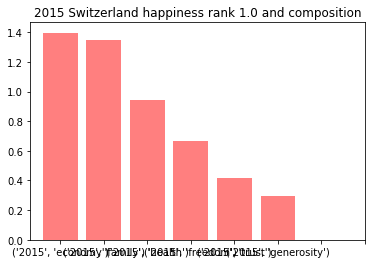

In [75]:
bar_composits('2015', 'Switzerland')